In [28]:
import os # OS come with Python
import cv2            # pip3 install opencv-python
import numpy as np    # pip3 install numpy
from tqdm import tqdm # pip3 install tqdm
# set to true to one once, then back to false unless you want to change something in your training data.
REBUILD_DATA = True 
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "../../keggle_data/PetImages/Cat"
    DOGS = "../../keggle_data/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    def make_training_data(self):
        icnt = 0
        for label in self.LABELS:
            print('label:', label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                        # do something like print(np.eye(2)[1]), just makes one_hot
                        #if icnt <= 5 or (icnt > 4000 and icnt <= 4005):
                        #    print('icnt:', icnt, 'eye:', np.eye(2)[self.LABELS[label]])
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        pass
                        #print(label, f, str(e))
                icnt += 1
        np.random.shuffle(self.training_data)
        #np.save("training_data.npy", self.training_data)
        #self.save_training_data('training_data.npy')
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)
    
    def get_training_data(self):
        return self.training_data

    def print_training_data(self):
        print(self.training_data[:1])
        #for data in self.training_data:
        #    print(data)

    def save_training_data(self, fn):
        with open(fn, 'w+', encoding='utf8') as f:
            for data_0, data_1 in self.training_data:
                f.write(str(data_0))
                f.write(str(data_1))
    
    def load_training_data(self, fn):
        with open(fn, 'r', encoding='utf8') as f:
            read_data = []
            data = []
            data.append(f.read())
            data.append(f.read())
            read_data.append(list(data))
        return read_data

if REBUILD_DATA:
    training_data = []
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()
    dogsvcats.print_training_data()
    #read_data = []
    #read_data = dogsvcats.load_training_data('training_data.npy')
    #print('read_data[:1]', read_data[:1])
    training_data = dogsvcats.get_training_data()
    print('len(training_data):', len(training_data))

label: ../../keggle_data/PetImages/Cat


100%|█████████████████████████████████████| 4001/4001 [00:02<00:00, 1568.69it/s]


label: ../../keggle_data/PetImages/Dog


100%|█████████████████████████████████████| 4006/4006 [00:02<00:00, 1547.11it/s]

Cats: 4000
Dogs: 4005
[[array([[227, 227, 230, ...,  21,  19,  40],
       [227, 228, 226, ...,  77, 169, 204],
       [227, 228, 226, ..., 100, 201, 195],
       ...,
       [154, 156, 129, ..., 134, 148, 159],
       [148, 155, 151, ..., 142, 141, 112],
       [156, 113, 194, ..., 151, 182, 166]], dtype=uint8), array([1., 0.])]]
len(training_data): 8005


[array([[ 37,  55,  67, ...,   8,  17,  14],
       [ 43,  53,  68, ...,  17,  15,  14],
       [ 11,  15,  22, ...,  16,  16,  15],
       ...,
       [ 40,  45,  49, ..., 190, 171, 198],
       [ 47,  50,  50, ..., 218, 162, 197],
       [ 50,  49,  50, ..., 187, 165, 206]], dtype=uint8), array([0., 1.])]


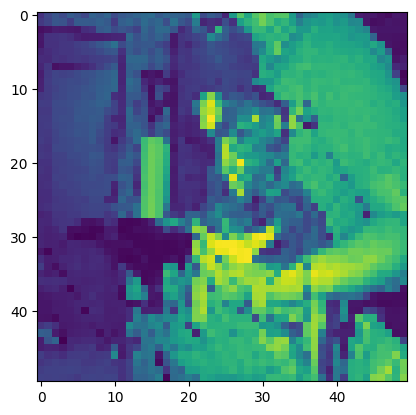

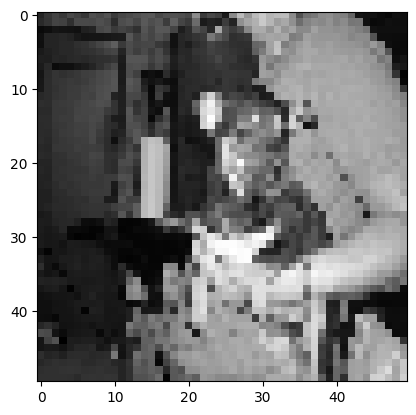

In [3]:
print(training_data[1])
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0])
plt.show()

import matplotlib.pyplot as plt
plt.imshow(training_data[1][0], cmap="gray")
plt.show()

[array([[ 79,  79,  77, ..., 105, 109, 105],
       [ 74,  76,  78, ..., 108, 106, 109],
       [ 75,  77,  80, ..., 110, 116, 112],
       ...,
       [136, 108, 130, ..., 159, 158, 156],
       [126, 158, 117, ..., 135, 165, 179],
       [141, 117, 140, ..., 161, 173, 153]], dtype=uint8), array([0., 1.])]


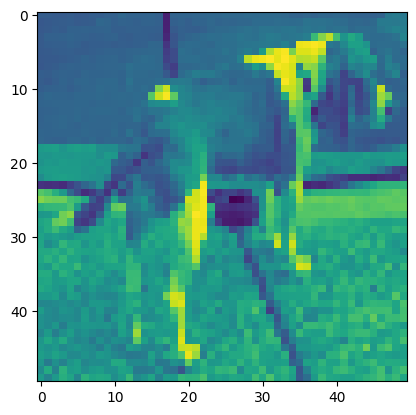

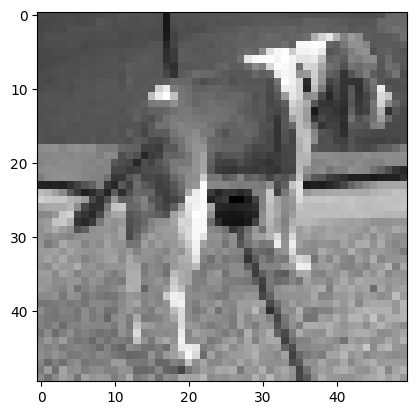

In [4]:
print(training_data[5000])
import matplotlib.pyplot as plt
plt.imshow(training_data[5000][0])
plt.show()
import matplotlib.pyplot as plt
plt.imshow(training_data[5000][0], cmap="gray")
plt.show()

In [51]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module): 
    def __init__(self):
        super().__init__()
        # Now, create our layers
        self.conv1 = nn.Conv2d(1, 32, 5)   # (in_chan, out_chan, kernel_size=5x5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        x = torch.randn(50, 50).view(-1, 1, 50, 50)  # input image
        self._to_linear = None
        self.convs(x)
        # Linear Layers
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
    
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        #print('x[0].shape:', x[0].shape)
        if self._to_linear is None:
             self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2] 
        return x

    def forward (self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #return x
        return F.softmax(x, dim = 1) # add the softmax. dim = 1 is for distritubtion

net = Net()

In [53]:
import torch.optim as optim
optimizer = optim.Adam (net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()
X = torch.Tensor ([i[0] for i in training_data]).view(-1, 50, 50) 
X = X/255.0      # scale into 0 to 1
y = torch.Tensor ([i[1] for i in training_data])
VAL_PCT = 0.1
val_size = int (len(X)*VAL_PCT)
print (val_size)

800


In [44]:
train_X = X[:-val_size]  # from beginning to last (-1) val_size
train_y = y[:-val_size]
test_X = X[-val_size:] # from last(-1) val_size to the end
test_y = y[-val_size:]
print ('len(train_X):', len(train_X))
print ('len(test_x):', len(test_X))

len(train_X): 7205
len(test_x): 800


In [55]:
BATCH_SIZE = 100
EPOCHS = 1
for epoch in range(EPOCHS):
    for i in tqdm (range(0, len(train_X), BATCH_SIZE)):
        # print (i, i + BATCH_SIZE)
        batch_X = train_X[i: i + BATCH_SIZE].view (-1, 1, 50, 50)
        batch_y = train_y[i: i+ BATCH_SIZE]
        net.zero_grad()
        outputs = net(batch_X)
        loss = loss_function (outputs, batch_y)
        loss.backward()
        optimizer.step()
print('loss:', loss)

  0%|                                                    | 0/73 [00:00<?, ?it/s]/home/peter/.local/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|███████████████████████████████████████████| 73/73 [00:12<00:00,  6.00it/s]

loss: tensor(0.2064, grad_fn=<MseLossBackward0>)


In [59]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm (range (len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy:", round (correct/total, 3))

100%|███████████████████████████████████████| 800/800 [00:00<00:00, 1336.69it/s]

Accuracy: 0.605
